# Physik der sozio-ökonomischen Systeme mit dem Computer
# (Physics of Socio-Economic Systems with the Computer)

### Vorlesung gehalten an der J.W.Goethe-Universität in Frankfurt am Main 
#### (Sommersemester 2024)

### von Dr.phil.nat. Dr.rer.pol. Matthias Hanauske

### Frankfurt am Main 21.05.2024

### Dritter Vorlesungsteil:  
### Evolutionäre räumliche Spiele (spatial games)
#### Beispiel: Koordinations- und Anti-Koordinationsspiele

## Einführung

Die Verkn&uuml;pfung der Theorie komplexer Netzwerke (siehe Teil II der Vorlesung) mit der evolution&auml;ren Spieltheorie (siehe Teil I der Vorlesung) stellt ein vielversprechendes mathematisches Modell dar, welches sowohl der interdisziplin&auml;ren Grundlagenforschung, als auch der angewandten, empirischen Netzwerkforschung dienen kann. In diesem Kapitel wird die Vorgehensweise einer Miteinbeziehung komplexer Netzwerktopologien in die evolution&auml;re Spieltheorie beschrieben. Die dann auf einem solchen komplexen Netzwerk ablaufenden Entscheidungsprozesse k&ouml;nnen in den meisten F&auml;llen lediglich mittels numerischer, Agenten-basierter Computersimulationen veranschaulicht werden.

In diesem Jupyter Notebook werden die Spieler einer endlich gro&szlig;en Population auf einem r&auml;umlichen Gitter angeordnet, wobei jeder Spieler nur mit seinen n&auml;chsten Nachbarn spielen kann (<i>Moore Nachbarschaft</i>). Das zugrundeliegende Netzwerk der Spielerknoten besitzt somit eine einfache regul&auml;re Struktur und im betrachteten 2-dimensionalen Fall spielt jeder Spieler pro Spielperiode mit acht Spielern (Knotengrad $k_i=8\, \forall\, i \in {\cal I}$). Wir beschr&auml;nken uns im folgenden auf symmetrische (2x2)-Spiele und benutzen den Ansatz eines allgemeinen (2 Personen)-(2 Strategien) Spiels mit symmetrischer Auszahlungsmatrix und Parametern a, b, c und d. Die Spielerknoten spielen pro Iteration mit jedem ihrer Nachbarn und  am Ende von jedem Zeitschritt vergleichen die Spieler ihren summierten Gewinn/Verlust mit den Nachbarspielern ihres Umfeldes. Ist die Auszahlung eines Spielers h&ouml;her als der eigene Auszahlungswert, so &auml;ndern der Spieler in der n&auml;chsten Spielperiode seine Strategie; ist sein eigener Wert der h&ouml;chste, so bleibt er auch in der n&auml;chsten Iteration bei seiner gespielten Strategie.

Im Folgenden betrachten wir Beispiele von Koordinations- und Anti-Koordinationsspielen und vergleichen die zeitliche Entwicklung der räumlichen Spiele mit den Ergebnissen der klassischen evolutionären Spieltheorie. In der klassischen evolutionären Spieltheorie (siehe Teil I der Vorlesung) betrachtete man eine unendlich große Population von Spielern, wobei jeder Spieler im Prinzip mit jedem anderen Spieler in Kontakt treten und das Spiel spielen konnte. Mittels der Replikatordynamik konnten wir dann das zeitliche Verhalten des Populationsvektors $x(t)$ (Anteil der Spieler, die die Strategie $s_1\hat{=}$<i>Blau</i> spielen) berechnen.

Wir nehmen im Folgenden ein allgemeines symmetrisches (2x2)-Spiel mit folgender Auszahlungsmatrix an:

$   \hat{\bf {\cal \$}}=
  \left( {\begin{array}{cc}
   a & b \\
   c & d \\
  \end{array} } \right)
$


### Die Klasse der Koordinationsspiele ( a > c und b < d )

#### Wiederholung aus Teil I: 

Ein Koordinationsspiel existiert, falls die Parameter a, b, c und d der Auszahlungsmatrix die folgenden Bedingungen erfüllen: a > c und b < d . Bei dieser Spielklasse existieren drei Nash-Gleichgewichte, ein gemischtes Nash-Gleichgewicht und zwei reine, symmetrische Nash-Gleichgewicht bei (x,y)=(0,0) und (x,y)=(1,1). 

Abhängig von der gewählten Anfangszusammensetzung der Population entwickelt sich die Population in einem Koordinationsspiel zu einem Zustand, in dem entweder alle Spieler die Strategie 2 (rot, x=0) bzw. alle die Strategie 1 (blau, x=1) wählen. Ist der Wert der gewählten Anfangszusammensetzung größer (bzw. kleiner) als ein bestimmter kritischer Wert, so wird die Strategienwahl der Population im Laufe der Zeit zu x=1 (bzw. x=0) gezogen - man sagt, es gibt zwei evolutionär stabile Strategien in Koordinationsspielen. Der kritische Anfangswertwert $x^\star$ entspricht dem gemischten Nash-Gleichgewicht des zugrundeliegenden Koordinationsspiels und ist außerdem die interne Nullstelle der Funktion g(x), die die Differentialgleichung bestimmt (g(x)=0).

Wir legen zunächst die Auszahlungsmatrix des Koordinationsspiels fest

$   \hat{\bf {\cal \$}}=
  \left( {\begin{array}{cc}
   3 & 4 \\
   1 & 5 \\
  \end{array} } \right)
$

und definieren wir die gemischte Auszahlungsfunktion ${\bf \tilde{\cal \$}}(x,y)$ der Spieler:

In [1]:
a,b,c,d = 3,4,1,5
def Dollar(x,y):
    GemischteAuszahlung = a*x*y+b*x*(1-y)+c*(1-x)*y+d*(1-x)*(1-y)
    return GemischteAuszahlung

Definition der Funktion g(x) und der Differentialgleichung des evolutionären Spiels.

In [2]:
def g(x,a,b,c,d):
    g = ((a-c)*(x-x*x) + (b-d)*(1-2*x+x*x))*x
    return g
def DGL(t, x):
    dxdt = g(x,a,b,c,d)
    return dxdt

In der folgenden Animation werden die Ergebnisse der zeitlichen Entwicklung des räumlichen Spiels mit den Ergebnissen der klassischen evolutionären Spieltheorie verglichen. Wir initialisieren am Anfang eine zufällige Strategienwahl der Spieler auf dem räumlichen Netzwerk, wobei im Mittel 60% der Spieler die Strategie "blau" spielen ($x_0=x(t=0)=0.6$).

In [3]:
import networkx as nx
from random import uniform
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib.gridspec as gridspec
from scipy.integrate import solve_ivp
params = {
    'figure.figsize'    : [10,4.5],
#    'text.usetex'       : True,
    'axes.titlesize' : 14,
    'axes.labelsize' : 16,  
    'xtick.labelsize' : 14 ,
    'ytick.labelsize' : 14 
}
matplotlib.rcParams.update(params) 

In [4]:
G=nx.Graph()
Nx=35
Ny=35
N=int(Nx*Ny)
x0=0.6
Nit=11
PropPlayers=np.zeros([N,10])
AverageStratPlayers=np.zeros([Nit+1,2])
for it in range(1,Nit+1):
    AverageStratPlayers[it].flat[0] = -1

k=0
ColorPlayer=[]
for i in range(0,Nx):
    for j in range(0,Ny):
        G.add_node(k)
        PropPlayers[k,0] = k #Knotennummer
        PropPlayers[k,1] = i #x-Koordinate auf dem 2-D Gitter
        PropPlayers[k,2] = j #y-Koordinate auf dem 2-D Gitter
        strategy=uniform(0, 100)#Zufaellige Strategienwahl 
        if strategy >= x0*100:
            PropPlayers[k,3]=0 #entspricht Strategie s_2
            ColorPlayer.append("red")
        else:
            PropPlayers[k,3]=1 #entspricht Strategie s_1
            ColorPlayer.append("blue")
        
        center = i*Ny + j
        upperleft = ((i-1)%Nx)*Ny + (j-1)%Ny
        up = ((i  )%Nx)*Ny + (j-1)%Ny
        upperright = ((i+1)%Nx)*Ny + (j-1)%Ny
        right = ((i+1)%Nx)*Ny + (j  )%Ny
        lowerright = ((i+1)%Nx)*Ny + (j+1)%Ny
        low = ((i  )%Nx)*Ny + (j+1)%Ny
        lowerleft = ((i-1)%Nx)*Ny + (j+1)%Ny
        left = ((i-1)%Nx)*Ny + (j  )%Ny
        G.add_edge(center, upperleft)
        G.add_edge(center, up)
        G.add_edge(center, upperright)
        G.add_edge(center, right)
        G.add_edge(center, lowerright)
        G.add_edge(center, low)
        G.add_edge(center, lowerleft)
        G.add_edge(center, left)
        k = k + 1

t_val = np.linspace(0, Nit, 1000)
cmap = plt.cm.Blues 
num_x0 = 30
line_colors = cmap(np.linspace(0,1,num_x0+10))
x0 = np.linspace(0.01,0.99,num_x0)

fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.3)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

Loes = solve_ivp(DGL, [0, Nit], x0, t_eval=t_val)
for j in range(num_x0):
    ax1.plot(Loes.t,Loes.y[j],c=line_colors[j+5], linewidth=1.5, linestyle='-')

ax1.set_ylabel(r"$\rm x(t)$")
ax1.set_xlabel(r"$\rm t$")
ax1.set_xlim(0,Nit-1)
ax1.set_ylim(0,1)

def init():   
    ax2.scatter(PropPlayers[:,1],PropPlayers[:,2],s=30,c=ColorPlayer,marker="s",alpha=1,edgecolor='none')
    ax2.set_xlim(-0.75, Nx-0.25)
    ax2.set_ylim(-0.75, Ny-0.25)
    ax2.set_ylabel(r"$\rm y$")
    ax2.set_xlabel(r"$\rm x$")
    AverageStratPlayers[0,0] = np.sum(PropPlayers[:,3])/N
    ax1.scatter(0,AverageStratPlayers[0,0], alpha=1, c="black",marker="o",s=50)
    return fig,

def animate(i):
    ax2.cla()
    for games in list(G.edges):
        PropPlayers[games[0],4] = Dollar(PropPlayers[games[0],3],PropPlayers[games[1],3]) + PropPlayers[games[0],4] 
        PropPlayers[games[1],4] = Dollar(PropPlayers[games[1],3],PropPlayers[games[0],3]) + PropPlayers[games[1],4] 
    for n in range(0,N):
        PropPlayers[n,5]=PropPlayers[n,3]
        maxpayoff=PropPlayers[n,4]
        for neig in list(G.neighbors(n)):
            if PropPlayers[neig,4] > PropPlayers[n,4] and PropPlayers[neig,4] > maxpayoff:
                maxpayoff = PropPlayers[neig,4]
                PropPlayers[n,5] = PropPlayers[neig,3]
    ColorPlayernew = []
    ColorPlayer = []
    for n in range(0,N):
        if PropPlayers[n,5]==0:
            ColorPlayernew.append("red")
        if PropPlayers[n,5]==1:
            ColorPlayernew.append("blue")
        if PropPlayers[n,3]==0:
            ColorPlayer.append("red")
        if PropPlayers[n,3]==1:
            ColorPlayer.append("blue") 
        PropPlayers[n,3] = PropPlayers[n,5]
        PropPlayers[n,4] = 0
    AverageStratPlayers[i+1,0] = np.sum(PropPlayers[:,3])/N
    ax1.plot(range(0,i+1,1),AverageStratPlayers[0:i+1,0], linewidth=1, linestyle='-', alpha=1, c="black")
    ax2.scatter(PropPlayers[:,1],PropPlayers[:,2],s=30,c=ColorPlayer,marker="s",alpha=1,edgecolor='none')
    ColorPlayer = ColorPlayernew
    return fig,

ani = animation.FuncAnimation(fig,animate,init_func=init,frames=Nit,interval=700)

plt.close(ani._fig)

HTML(ani.to_html5_video())

Left: Evolution of the population vector $x^{\tiny \rm SP}(t)$ of the spatial game with random initial conditions (black curve, $x^{\tiny \rm SP}_0=0.6$) in comparison with the results obtained for several different initial values within the evolutionary game theoretical framework ($x(t)$, solid blue curves). Right: Spatial allocation of player decisions within a regular grid using the ''Moore neighborhood'' configuration. 

Die schwarze Kurve in der oberen Animation zeigt, dass sich bei dem räumlichen Spiel in der ersten Spielperiode der Anteil der blauen Spieler zunächst erhöht, dann jedoch monoton abfällt, sodass sich schließlich die rote Strategie durchsetzt. Vergleicht man diese Ergebnisse mit den Ergebnissen der evolutionären Spieltheorie (blaue Kurven), so würde man bei diesem Koordinationsspiel erwarten, dass sich die blaue Strategie durchsetzen müsste, da der initiale Anfangswert der Strategienwahl höher als das gemischte Nash-Gleichgewicht ist.

Im Folgenden betrachten wir die Auswirkungen der initialen Strategienwahl und die Auswirkungen des Wertes des gemischten Nash Gleichgewichtes auf die zeitliche Entwicklung des räumlichen Spiels. Hierzu erzeugen wir ein Ensemble, bestehend aus jeweils fünf zufälligen Anfangsbedingungen mit drei unterschiedlichen Mittelwerten des Populationsvektors $x^{\tiny \rm SP}_0=[0.25,0.5,0.75]$. Obwohl sich die fünf Mittelwerten der Anfangskonstellationen $x^{\tiny \rm SP}_0$ innerhalb eines Ensembles nur geringfügig unterscheiden, ist die konkrete Realisierung auf dem zweidimensionalen Gitter unterschiedlich, sodass die zeitliche Entwicklung oft auch unterscheidet. 

Des Weiteren betrachten wir zwei geringfügig unterschiedliche Koordinationsspiele mit den folgenden Auszahlungsmatrizen:

Linke Abbildung: 
$   \hat{\bf {\cal \$}}=
  \left( {\begin{array}{cc}
   3 & 4 \\
   1 & 5 \\
  \end{array} } \right) \quad,\qquad
$
Rechte Abbildung: 
$   \hat{\bf {\cal \$}}=
  \left( {\begin{array}{cc}
   3 & 4 \\
   1 & 4.5 \\
  \end{array} } \right) \qquad
$

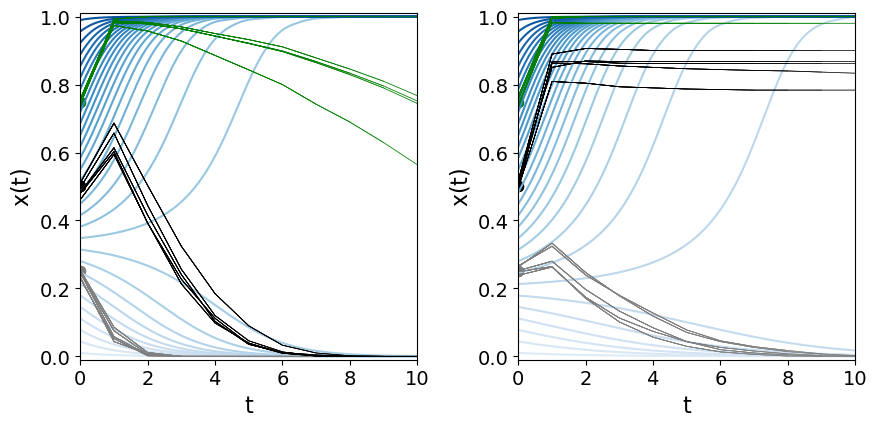

In [5]:
G=nx.Graph()
Nx = 35
Ny = 35
N = int(Nx*Ny)

PropPlayers = np.zeros([N,10])
k = 0
for i in range(0,Nx):
    for j in range(0,Ny):
        G.add_node(k)
        PropPlayers[k,0] = k #Knotennummer
        PropPlayers[k,1] = i #x-Koordinate auf dem 2-D Gitter
        PropPlayers[k,2] = j #y-Koordinate auf dem 2-D Gitter        
        center = i*Ny + j
        upperleft = ((i-1)%Nx)*Ny + (j-1)%Ny
        up = ((i  )%Nx)*Ny + (j-1)%Ny
        upperright = ((i+1)%Nx)*Ny + (j-1)%Ny
        right = ((i+1)%Nx)*Ny + (j  )%Ny
        lowerright = ((i+1)%Nx)*Ny + (j+1)%Ny
        low = ((i  )%Nx)*Ny + (j+1)%Ny
        lowerleft = ((i-1)%Nx)*Ny + (j+1)%Ny
        left = ((i-1)%Nx)*Ny + (j  )%Ny
        G.add_edge(center, upperleft)
        G.add_edge(center, up)
        G.add_edge(center, upperright)
        G.add_edge(center, right)
        G.add_edge(center, lowerright)
        G.add_edge(center, low)
        G.add_edge(center, lowerleft)
        G.add_edge(center, left)
        k = k + 1

Nit = 11
t_val = np.linspace(0, Nit, 1001)
cmap = plt.cm.Blues 
num_x0 = 30
line_colors = cmap(np.linspace(0,1,num_x0+10))
x0a = np.linspace(0.01,0.99,num_x0)
 
fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.3)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

a,b,c,d = 3,4,1,5
Loes = solve_ivp(DGL, [0, Nit], x0a, t_eval=t_val)
for j in range(num_x0):
    ax1.plot(Loes.t,Loes.y[j],c=line_colors[j+5], linewidth=1.5, linestyle='-')

ax1.set_ylabel(r"$\rm x(t)$")
ax1.set_xlabel(r"$\rm t$")
ax1.set_xlim(0,Nit-1)
ax1.set_ylim(-0.01,1.01)

Nensemble = 5
x0 = [0.25,0.5,0.75]
colorens = ["grey","black","green"]

for l in range(0,len(x0)):
    for en in range(Nensemble):
        x00 = x0[l]
        colorensemble = colorens[l]
        AverageStratPlayers = np.zeros([Nit+2,2])
        for it in range(1,Nit+2):
            AverageStratPlayers[it,0] = -1
        k = 0
        ColorPlayer=[]
        for i in range(0,Nx):
            for j in range(0,Ny):
                strategy = uniform(0, 100)#Zufaellige Strategienwahl 
                if strategy >= x00*100:
                    PropPlayers[k,3]=0 #entspricht Strategie s_2
                    ColorPlayer.append("red")
                else:
                    PropPlayers[k,3]=1 #entspricht Strategie s_1
                    ColorPlayer.append("blue")
                k = k + 1
        AverageStratPlayers[0,0] = np.sum(PropPlayers[:,3])/N
        ax1.scatter(0,x00, alpha=1, c=colorensemble,marker="o",s=50)
        for it in range(0,Nit+1):
            for games in list(G.edges):
                PropPlayers[games[0],4] = Dollar(PropPlayers[games[0],3],PropPlayers[games[1],3]) + PropPlayers[games[0],4] 
                PropPlayers[games[1],4] = Dollar(PropPlayers[games[1],3],PropPlayers[games[0],3]) + PropPlayers[games[1],4] 
            for n in range(0,N):
                PropPlayers[n,5] = PropPlayers[n,3]
                maxpayoff = PropPlayers[n,4]
                for neig in list(G.neighbors(n)):
                    if PropPlayers[neig,4] > PropPlayers[n,4] and PropPlayers[neig,4] > maxpayoff:
                        maxpayoff = PropPlayers[neig,4]
                        PropPlayers[n,5] = PropPlayers[neig,3]
            ColorPlayernew=[]
            ColorPlayer=[]
            for n in range(N):
                if PropPlayers[n,5]==0:
                    ColorPlayernew.append("red")
                if PropPlayers[n,5]==1:
                    ColorPlayernew.append("blue")
                if PropPlayers[n,3]==0:
                    ColorPlayer.append("red")
                if PropPlayers[n,3]==1:
                    ColorPlayer.append("blue") 
                PropPlayers[n,3] = PropPlayers[n,5]
                PropPlayers[n,4] = 0
            AverageStratPlayers[it+1,0] = np.sum(PropPlayers[:,3])/N
            ax1.plot(range(0,it+1,1),AverageStratPlayers[0:it+1,0], linewidth=0.5, linestyle='-', alpha=0.7, c=colorensemble)
            ColorPlayer = ColorPlayernew

a,b,c,d = 3,4,1,4.5
Loes = solve_ivp(DGL, [0, Nit], x0a, t_eval=t_val)
for j in range(num_x0):
    ax2.plot(Loes.t,Loes.y[j],c=line_colors[j+5], linewidth=1.5, linestyle='-')

ax2.set_ylabel(r"$\rm x(t)$")
ax2.set_xlabel(r"$\rm t$")
ax2.set_xlim(0,Nit-1)
ax2.set_ylim(-0.01,1.01)

Nensemble = 5
x0 =[0.25,0.5,0.75]
colorens = ["grey","black","green"]

for l in range(0,len(x0)):
    for en in range(Nensemble):
        x00 = x0[l]
        colorensemble = colorens[l]
        AverageStratPlayers = np.zeros([Nit+2,2])
        for it in range(1,Nit+2):
            AverageStratPlayers[it,0] = -1
        k = 0
        ColorPlayer=[]
        for i in range(0,Nx):
            for j in range(0,Ny):
                strategy = uniform(0, 100)#Zufaellige Strategienwahl 
                if strategy >= x00*100:
                    PropPlayers[k,3]=0 #entspricht Strategie s_2
                    ColorPlayer.append("red")
                else:
                    PropPlayers[k,3]=1 #entspricht Strategie s_1
                    ColorPlayer.append("blue")
                k = k + 1
        AverageStratPlayers[0,0] = np.sum(PropPlayers[:,3])/N
        ax2.scatter(0,x00, alpha=1, c=colorensemble,marker="o",s=50)
        for it in range(0,Nit+1):
            for games in list(G.edges):
                PropPlayers[games[0],4] = Dollar(PropPlayers[games[0],3],PropPlayers[games[1],3]) + PropPlayers[games[0],4] 
                PropPlayers[games[1],4] = Dollar(PropPlayers[games[1],3],PropPlayers[games[0],3]) + PropPlayers[games[1],4] 
            for n in range(0,N):
                PropPlayers[n,5] = PropPlayers[n,3]
                maxpayoff = PropPlayers[n,4]
                for neig in list(G.neighbors(n)):
                    if PropPlayers[neig,4] > PropPlayers[n,4] and PropPlayers[neig,4] > maxpayoff:
                        maxpayoff = PropPlayers[neig,4]
                        PropPlayers[n,5] = PropPlayers[neig,3]
            ColorPlayernew=[]
            ColorPlayer=[]
            for n in range(N):
                if PropPlayers[n,5]==0:
                    ColorPlayernew.append("red")
                if PropPlayers[n,5]==1:
                    ColorPlayernew.append("blue")
                if PropPlayers[n,3]==0:
                    ColorPlayer.append("red")
                if PropPlayers[n,3]==1:
                    ColorPlayer.append("blue") 
                PropPlayers[n,3] = PropPlayers[n,5]
                PropPlayers[n,4] = 0
            AverageStratPlayers[it+1,0] = np.sum(PropPlayers[:,3])/N
            ax2.plot(range(0,it+1,1),AverageStratPlayers[0:it+1,0], linewidth=0.5, linestyle='-', alpha=0.7, c=colorensemble)
            ColorPlayer = ColorPlayernew

In der linken Abbildung erkennt man, dass sich in den meisten Realisierungen des räumlichen Spiels die rote Strategie durchsetzt, und sich lediglich bei Konstellationen mit  $x^{\tiny \rm SP}_0=0.75$ (grüne Kurven) die blaue Strategie durchsetzt. In allen Fällen entwickelt sich das System jedoch für längere Zeiten zu einer der von der evolutionären Spieltheorie vorhergesagten evolutionär stabilen Strategien (alle Spieler spielen nur rot, oder nur blau) - dies gilt auch für die abfallenden grünen Kurven, die sich für größere Zeiten zu x=0 entwickeln.

In der rechten Abbildung erkennt man, dass sich nun (da der Wert des gemischten Nash Gleichgewichtes geringer ist) nur die Konstellationen mit  $x^{\tiny \rm SP}_0=0.25$ (graue Kurven) zu x=0 entwickeln. Für $x^{\tiny \rm SP}_0=0.5$ (schwarze Kurven) tritt eine neue Eigenschaft von räumlichen Spielen auf, die es bei den Lösungen der klassischen evolutionären Spieltheorie (blaue Kurven) so nicht gibt. Die schwarzen Kurven enden alle in einem stabilen, statischen Endzustand, der weder x=0 (alle Spieler spielen die rote Strategie) noch x=1 (alle Spieler spielen die blaue Strategie) repräsentiert. Um diese Situation zu verstehen, betrachten wir uns die zeitliche Entwicklung einer solchen Konstellation in einer Animation:

In [6]:
a,b,c,d = 3,4,1,4.5
G=nx.Graph()
Nx=35
Ny=35
N=int(Nx*Ny)
x0=0.5
Nit=15
PropPlayers=np.zeros([N,10])
AverageStratPlayers=np.zeros([Nit+1,2])
for it in range(1,Nit+1):
    AverageStratPlayers[it].flat[0] = -1

k=0
ColorPlayer=[]
for i in range(0,Nx):
    for j in range(0,Ny):
        G.add_node(k)
        PropPlayers[k,0] = k #Knotennummer
        PropPlayers[k,1] = i #x-Koordinate auf dem 2-D Gitter
        PropPlayers[k,2] = j #y-Koordinate auf dem 2-D Gitter
        strategy=uniform(0, 100)#Zufaellige Strategienwahl 
        if strategy >= x0*100:
            PropPlayers[k,3]=0 #entspricht Strategie s_2
            ColorPlayer.append("red")
        else:
            PropPlayers[k,3]=1 #entspricht Strategie s_1
            ColorPlayer.append("blue")
        
        center = i*Ny + j
        upperleft = ((i-1)%Nx)*Ny + (j-1)%Ny
        up = ((i  )%Nx)*Ny + (j-1)%Ny
        upperright = ((i+1)%Nx)*Ny + (j-1)%Ny
        right = ((i+1)%Nx)*Ny + (j  )%Ny
        lowerright = ((i+1)%Nx)*Ny + (j+1)%Ny
        low = ((i  )%Nx)*Ny + (j+1)%Ny
        lowerleft = ((i-1)%Nx)*Ny + (j+1)%Ny
        left = ((i-1)%Nx)*Ny + (j  )%Ny
        G.add_edge(center, upperleft)
        G.add_edge(center, up)
        G.add_edge(center, upperright)
        G.add_edge(center, right)
        G.add_edge(center, lowerright)
        G.add_edge(center, low)
        G.add_edge(center, lowerleft)
        G.add_edge(center, left)
        k = k + 1

t_val = np.linspace(0, Nit, 1000)
cmap = plt.cm.Blues 
num_x0 = 30
line_colors = cmap(np.linspace(0,1,num_x0+10))
x0 = np.linspace(0.01,0.99,num_x0)

fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.3)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

Loes = solve_ivp(DGL, [0, Nit], x0, t_eval=t_val)
for j in range(num_x0):
    ax1.plot(Loes.t,Loes.y[j],c=line_colors[j+5], linewidth=1.5, linestyle='-')

ax1.set_ylabel(r"$\rm x(t)$")
ax1.set_xlabel(r"$\rm t$")
ax1.set_xlim(0,Nit-1)
ax1.set_ylim(0,1)

def init():   
    ax2.scatter(PropPlayers[:,1],PropPlayers[:,2],s=30,c=ColorPlayer,marker="s",alpha=1,edgecolor='none')
    ax2.set_xlim(-0.75, Nx-0.25)
    ax2.set_ylim(-0.75, Ny-0.25)
    ax2.set_ylabel(r"$\rm y$")
    ax2.set_xlabel(r"$\rm x$")
    AverageStratPlayers[0,0] = np.sum(PropPlayers[:,3])/N
    ax1.scatter(0,AverageStratPlayers[0,0], alpha=1, c="black",marker="o",s=50)
    return fig,

def animate(i):
    ax2.cla()
    for games in list(G.edges):
        PropPlayers[games[0],4] = Dollar(PropPlayers[games[0],3],PropPlayers[games[1],3]) + PropPlayers[games[0],4] 
        PropPlayers[games[1],4] = Dollar(PropPlayers[games[1],3],PropPlayers[games[0],3]) + PropPlayers[games[1],4] 
    for n in range(0,N):
        PropPlayers[n,5]=PropPlayers[n,3]
        maxpayoff=PropPlayers[n,4]
        for neig in list(G.neighbors(n)):
            if PropPlayers[neig,4] > PropPlayers[n,4] and PropPlayers[neig,4] > maxpayoff:
                maxpayoff = PropPlayers[neig,4]
                PropPlayers[n,5] = PropPlayers[neig,3]
    ColorPlayernew = []
    ColorPlayer = []
    for n in range(0,N):
        if PropPlayers[n,5]==0:
            ColorPlayernew.append("red")
        if PropPlayers[n,5]==1:
            ColorPlayernew.append("blue")
        if PropPlayers[n,3]==0:
            ColorPlayer.append("red")
        if PropPlayers[n,3]==1:
            ColorPlayer.append("blue") 
        PropPlayers[n,3] = PropPlayers[n,5]
        PropPlayers[n,4] = 0
    AverageStratPlayers[i+1,0] = np.sum(PropPlayers[:,3])/N
    ax1.plot(range(0,i+1,1),AverageStratPlayers[0:i+1,0], linewidth=1, linestyle='-', alpha=1, c="black")
    ax2.scatter(PropPlayers[:,1],PropPlayers[:,2],s=30,c=ColorPlayer,marker="s",alpha=1,edgecolor='none')
    ColorPlayer = ColorPlayernew
    return fig,

ani = animation.FuncAnimation(fig,animate,init_func=init,frames=Nit,interval=700)

plt.close(ani._fig)

HTML(ani.to_html5_video())

Der statische Endzustand ist hierbei durch eine geometrische Anordnung unterschiedlich großer roter Rechtecke charakterisiert.

Die in diesem Jupyter Notebook dargestellten Ergebnisse der Koordinationsspiele können ebenfalls in dem folgenden Python Programm für ein größeres Netzwerk simuliert werden -> <A href="https://itp.uni-frankfurt.de/~hanauske/VPSOC/2024/python/VPSOC_GamesonNetwork_coordination_big2024.py" target=blank> VPSOC_GamesonNetwork_coordination_big2024.py</A>

### Die Klasse der Anti-Koordinationsspiele ( a < c und b > d )

#### Wiederholung aus Teil I: 

Ein Anti-Koordinationsspiel existiert, falls die Parameter a, b, c und d der Auszahlungsmatrix die folgenden Bedingungen erfüllen: a < c und b > d . Bei dieser Spielklasse existieren drei Nash-Gleichgewichte, ein gemischtes Nash-Gleichgewicht und zwei reine, unsymmetrische Nash-Gleichgewicht bei (x,y)=(0,1) und (x,y)=(0,1). 

Unabhängig von der gewählten Anfangszusammensetzung der Population entwickelt sich die Strategienwahl der Population zu einem Zustand der Koexistenz beider Strategien, wobei die für große Zeiten asymptotisch erreichte Population-Zusammensetzung durch den Wert des internen gemischten Nash-Gleichgewichts $x^\star$ gegeben ist und die evolutionär stabile Strategie des Spiels darstellt. Wieder lässt sich der Wert des gemischten Nash-Gleichgewichts durch Berechnung der internen Nullstelle der Funktion g(x) ermitteln ($g(x^\star)=0$).

Wir legen zunächst die Auszahlungsmatrix des Koordinationsspiels fest

$   \hat{\bf {\cal \$}}=
  \left( {\begin{array}{cc}
   1 & 5 \\
   2 & 3 \\
  \end{array} } \right)
$

und definieren so die gemischte Auszahlungsfunktion ${\bf \tilde{\cal \$}}(x,y)$ der Spieler im Anti-Koordinationsspiel. In der folgenden Animation veranschaulichen wir die zeitliche Entwicklung des räumlichen Anti-Koordinationsspiels mit den Ergebnissen der klassischen evolutionären Spieltheorie für eine zufällige Anfangskonfiguration mit $x^{\tiny \rm SP}_0=0.6$.

In [7]:
a,b,c,d = 1,5,2,3
G=nx.Graph()
Nx=35
Ny=35
N=int(Nx*Ny)
x0=0.6
Nit=14
PropPlayers=np.zeros([N,10])
AverageStratPlayers=np.zeros([Nit+1,2])
for it in range(1,Nit+1):
    AverageStratPlayers[it].flat[0] = -1

k=0
ColorPlayer=[]
for i in range(0,Nx):
    for j in range(0,Ny):
        G.add_node(k)
        PropPlayers[k,0] = k #Knotennummer
        PropPlayers[k,1] = i #x-Koordinate auf dem 2-D Gitter
        PropPlayers[k,2] = j #y-Koordinate auf dem 2-D Gitter
        strategy=uniform(0, 100)#Zufaellige Strategienwahl 
        if strategy >= x0*100:
            PropPlayers[k,3]=0 #entspricht Strategie s_2
            ColorPlayer.append("red")
        else:
            PropPlayers[k,3]=1 #entspricht Strategie s_1
            ColorPlayer.append("blue")
        
        center = i*Ny + j
        upperleft = ((i-1)%Nx)*Ny + (j-1)%Ny
        up = ((i  )%Nx)*Ny + (j-1)%Ny
        upperright = ((i+1)%Nx)*Ny + (j-1)%Ny
        right = ((i+1)%Nx)*Ny + (j  )%Ny
        lowerright = ((i+1)%Nx)*Ny + (j+1)%Ny
        low = ((i  )%Nx)*Ny + (j+1)%Ny
        lowerleft = ((i-1)%Nx)*Ny + (j+1)%Ny
        left = ((i-1)%Nx)*Ny + (j  )%Ny
        G.add_edge(center, upperleft)
        G.add_edge(center, up)
        G.add_edge(center, upperright)
        G.add_edge(center, right)
        G.add_edge(center, lowerright)
        G.add_edge(center, low)
        G.add_edge(center, lowerleft)
        G.add_edge(center, left)
        k = k + 1

t_val = np.linspace(0, Nit, 1000)
cmap = plt.cm.Oranges 
num_x0 = 30
line_colors = cmap(np.linspace(0,1,num_x0+10))
x0 = np.linspace(0.01,0.99,num_x0)

fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.3)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

Loes = solve_ivp(DGL, [0, Nit], x0, t_eval=t_val)
for j in range(num_x0):
    ax1.plot(Loes.t,Loes.y[j],c=line_colors[j+5], linewidth=1.5, linestyle='-')

ax1.set_ylabel(r"$\rm x(t)$")
ax1.set_xlabel(r"$\rm t$")
ax1.set_xlim(0,Nit-1)
ax1.set_ylim(0,1)

def init():   
    ax2.scatter(PropPlayers[:,1],PropPlayers[:,2],s=30,c=ColorPlayer,marker="s",alpha=1,edgecolor='none')
    ax2.set_xlim(-0.75, Nx-0.25)
    ax2.set_ylim(-0.75, Ny-0.25)
    ax2.set_ylabel(r"$\rm y$")
    ax2.set_xlabel(r"$\rm x$")
    AverageStratPlayers[0,0] = np.sum(PropPlayers[:,3])/N
    ax1.scatter(0,AverageStratPlayers[0,0], alpha=1, c="black",marker="o",s=50)
    return fig,

def animate(i):
    ax2.cla()
    for games in list(G.edges):
        PropPlayers[games[0],4] = Dollar(PropPlayers[games[0],3],PropPlayers[games[1],3]) + PropPlayers[games[0],4] 
        PropPlayers[games[1],4] = Dollar(PropPlayers[games[1],3],PropPlayers[games[0],3]) + PropPlayers[games[1],4] 
    for n in range(0,N):
        PropPlayers[n,5]=PropPlayers[n,3]
        maxpayoff=PropPlayers[n,4]
        for neig in list(G.neighbors(n)):
            if PropPlayers[neig,4] > PropPlayers[n,4] and PropPlayers[neig,4] > maxpayoff:
                maxpayoff = PropPlayers[neig,4]
                PropPlayers[n,5] = PropPlayers[neig,3]
    ColorPlayernew = []
    ColorPlayer = []
    for n in range(0,N):
        if PropPlayers[n,5]==0:
            ColorPlayernew.append("red")
        if PropPlayers[n,5]==1:
            ColorPlayernew.append("blue")
        if PropPlayers[n,3]==0:
            ColorPlayer.append("red")
        if PropPlayers[n,3]==1:
            ColorPlayer.append("blue") 
        PropPlayers[n,3] = PropPlayers[n,5]
        PropPlayers[n,4] = 0
    AverageStratPlayers[i+1,0] = np.sum(PropPlayers[:,3])/N
    ax1.plot(range(0,i+1,1),AverageStratPlayers[0:i+1,0], linewidth=1, linestyle='-', alpha=1, c="black")
    ax2.scatter(PropPlayers[:,1],PropPlayers[:,2],s=30,c=ColorPlayer,marker="s",alpha=1,edgecolor='none')
    ColorPlayer = ColorPlayernew
    return fig,

ani = animation.FuncAnimation(fig,animate,init_func=init,frames=Nit,interval=700)

plt.close(ani._fig)

HTML(ani.to_html5_video())

Die obere Animation zeigt, dass sich auch das räumliche Spiel zu einem dynamischen Gleichgewicht entwickelt, wobei der mittlere Wert des Populationsvektors $x^{\tiny \rm SP}$ sich nahe dem, von der evolutionären Spieltheorie vorhergesagten, gemischten Nash-Gleichgewicht aufhält.

Im Folgenden betrachten wir wieder die Auswirkungen der initialen Strategienwahl und die Auswirkungen des Wertes des gemischten Nash Gleichgewichtes auf die zeitliche Entwicklung des räumlichen Spiels. Hierzu erzeugen wir (wie im Koordinationsspiel weiter oben) ein Ensemble, bestehend aus jeweils fünf zufälligen Anfangsbedingungen mit drei unterschiedlichen Mittelwerten des Populationsvektors $x^{\tiny \rm SP}_0=[0.2,0.5,0.(]$. Obwohl sich die fünf Mittelwerten der Anfangskonstellationen $x^{\tiny \rm SP}_0$ innerhalb eines Ensembles nur geringfügig unterscheiden, ist die konkrete Realisierung auf dem zweidimensionalen Gitter unterschiedlich, sodass die zeitliche Entwicklung oft auch unterscheidet. 

Des Weiteren betrachten wir zwei geringfügig unterschiedliche Anti-Koordinationsspiele mit den folgenden Auszahlungsmatrizen:

Linke Abbildung: 
$   \hat{\bf {\cal \$}}=
  \left( {\begin{array}{cc}
   1 & 5 \\
   2 & 3 \\
  \end{array} } \right) \quad,\qquad
$
Rechte Abbildung: 
$   \hat{\bf {\cal \$}}=
  \left( {\begin{array}{cc}
   1 & 5 \\
   4 & 3 \\
  \end{array} } \right) \qquad
$

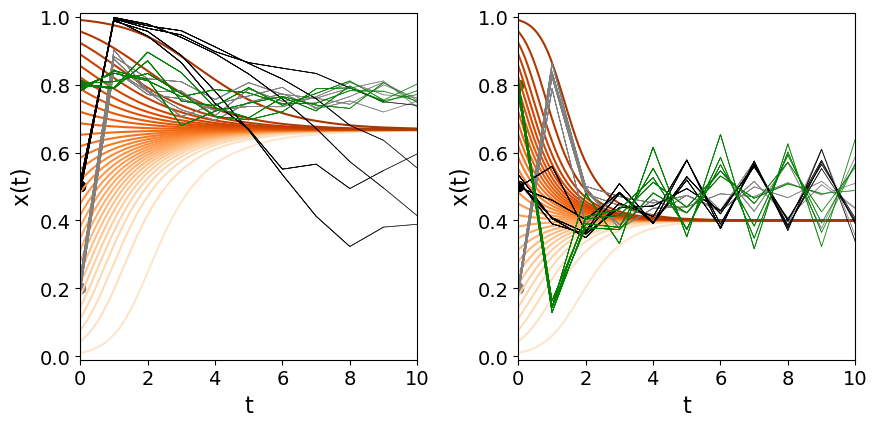

In [8]:
G=nx.Graph()
Nx = 35
Ny = 35
N = int(Nx*Ny)

PropPlayers = np.zeros([N,10])
k = 0
for i in range(0,Nx):
    for j in range(0,Ny):
        G.add_node(k)
        PropPlayers[k,0] = k #Knotennummer
        PropPlayers[k,1] = i #x-Koordinate auf dem 2-D Gitter
        PropPlayers[k,2] = j #y-Koordinate auf dem 2-D Gitter        
        center = i*Ny + j
        upperleft = ((i-1)%Nx)*Ny + (j-1)%Ny
        up = ((i  )%Nx)*Ny + (j-1)%Ny
        upperright = ((i+1)%Nx)*Ny + (j-1)%Ny
        right = ((i+1)%Nx)*Ny + (j  )%Ny
        lowerright = ((i+1)%Nx)*Ny + (j+1)%Ny
        low = ((i  )%Nx)*Ny + (j+1)%Ny
        lowerleft = ((i-1)%Nx)*Ny + (j+1)%Ny
        left = ((i-1)%Nx)*Ny + (j  )%Ny
        G.add_edge(center, upperleft)
        G.add_edge(center, up)
        G.add_edge(center, upperright)
        G.add_edge(center, right)
        G.add_edge(center, lowerright)
        G.add_edge(center, low)
        G.add_edge(center, lowerleft)
        G.add_edge(center, left)
        k = k + 1

Nit = 11
t_val = np.linspace(0, Nit, 1001)
cmap = plt.cm.Oranges
num_x0 = 30
line_colors = cmap(np.linspace(0,1,num_x0+10))
x0a = np.linspace(0.01,0.99,num_x0)
 
fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.3)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

a,b,c,d = 1,5,2,3
Loes = solve_ivp(DGL, [0, Nit], x0a, t_eval=t_val)
for j in range(num_x0):
    ax1.plot(Loes.t,Loes.y[j],c=line_colors[j+5], linewidth=1.5, linestyle='-')

ax1.set_ylabel(r"$\rm x(t)$")
ax1.set_xlabel(r"$\rm t$")
ax1.set_xlim(0,Nit-1)
ax1.set_ylim(-0.01,1.01)

Nensemble = 5
x0 = [0.2,0.5,0.8]
colorens = ["grey","black","green"]

for l in range(0,len(x0)):
    for en in range(Nensemble):
        x00 = x0[l]
        colorensemble = colorens[l]
        AverageStratPlayers = np.zeros([Nit+2,2])
        for it in range(1,Nit+2):
            AverageStratPlayers[it,0] = -1
        k = 0
        ColorPlayer=[]
        for i in range(0,Nx):
            for j in range(0,Ny):
                strategy = uniform(0, 100)#Zufaellige Strategienwahl 
                if strategy >= x00*100:
                    PropPlayers[k,3]=0 #entspricht Strategie s_2
                    ColorPlayer.append("red")
                else:
                    PropPlayers[k,3]=1 #entspricht Strategie s_1
                    ColorPlayer.append("blue")
                k = k + 1
        AverageStratPlayers[0,0] = np.sum(PropPlayers[:,3])/N
        ax1.scatter(0,x00, alpha=1, c=colorensemble,marker="o",s=50)
        for it in range(0,Nit+1):
            for games in list(G.edges):
                PropPlayers[games[0],4] = Dollar(PropPlayers[games[0],3],PropPlayers[games[1],3]) + PropPlayers[games[0],4] 
                PropPlayers[games[1],4] = Dollar(PropPlayers[games[1],3],PropPlayers[games[0],3]) + PropPlayers[games[1],4] 
            for n in range(0,N):
                PropPlayers[n,5] = PropPlayers[n,3]
                maxpayoff = PropPlayers[n,4]
                for neig in list(G.neighbors(n)):
                    if PropPlayers[neig,4] > PropPlayers[n,4] and PropPlayers[neig,4] > maxpayoff:
                        maxpayoff = PropPlayers[neig,4]
                        PropPlayers[n,5] = PropPlayers[neig,3]
            ColorPlayernew=[]
            ColorPlayer=[]
            for n in range(N):
                if PropPlayers[n,5]==0:
                    ColorPlayernew.append("red")
                if PropPlayers[n,5]==1:
                    ColorPlayernew.append("blue")
                if PropPlayers[n,3]==0:
                    ColorPlayer.append("red")
                if PropPlayers[n,3]==1:
                    ColorPlayer.append("blue") 
                PropPlayers[n,3] = PropPlayers[n,5]
                PropPlayers[n,4] = 0
            AverageStratPlayers[it+1,0] = np.sum(PropPlayers[:,3])/N
            ax1.plot(range(0,it+1,1),AverageStratPlayers[0:it+1,0], linewidth=0.5, linestyle='-', alpha=0.7, c=colorensemble)
            ColorPlayer = ColorPlayernew

a,b,c,d = 1,5,4,3
Loes = solve_ivp(DGL, [0, Nit], x0a, t_eval=t_val)
for j in range(num_x0):
    ax2.plot(Loes.t,Loes.y[j],c=line_colors[j+5], linewidth=1.5, linestyle='-')

ax2.set_ylabel(r"$\rm x(t)$")
ax2.set_xlabel(r"$\rm t$")
ax2.set_xlim(0,Nit-1)
ax2.set_ylim(-0.01,1.01)

Nensemble = 5
x0 = [0.2,0.5,0.8]
colorens = ["grey","black","green"]

for l in range(0,len(x0)):
    for en in range(Nensemble):
        x00 = x0[l]
        colorensemble = colorens[l]
        AverageStratPlayers = np.zeros([Nit+2,2])
        for it in range(1,Nit+2):
            AverageStratPlayers[it,0] = -1
        k = 0
        ColorPlayer=[]
        for i in range(0,Nx):
            for j in range(0,Ny):
                strategy = uniform(0, 100)#Zufaellige Strategienwahl 
                if strategy >= x00*100:
                    PropPlayers[k,3]=0 #entspricht Strategie s_2
                    ColorPlayer.append("red")
                else:
                    PropPlayers[k,3]=1 #entspricht Strategie s_1
                    ColorPlayer.append("blue")
                k = k + 1
        AverageStratPlayers[0,0] = np.sum(PropPlayers[:,3])/N
        ax2.scatter(0,x00, alpha=1, c=colorensemble,marker="o",s=50)
        for it in range(0,Nit+1):
            for games in list(G.edges):
                PropPlayers[games[0],4] = Dollar(PropPlayers[games[0],3],PropPlayers[games[1],3]) + PropPlayers[games[0],4] 
                PropPlayers[games[1],4] = Dollar(PropPlayers[games[1],3],PropPlayers[games[0],3]) + PropPlayers[games[1],4] 
            for n in range(0,N):
                PropPlayers[n,5] = PropPlayers[n,3]
                maxpayoff = PropPlayers[n,4]
                for neig in list(G.neighbors(n)):
                    if PropPlayers[neig,4] > PropPlayers[n,4] and PropPlayers[neig,4] > maxpayoff:
                        maxpayoff = PropPlayers[neig,4]
                        PropPlayers[n,5] = PropPlayers[neig,3]
            ColorPlayernew=[]
            ColorPlayer=[]
            for n in range(N):
                if PropPlayers[n,5]==0:
                    ColorPlayernew.append("red")
                if PropPlayers[n,5]==1:
                    ColorPlayernew.append("blue")
                if PropPlayers[n,3]==0:
                    ColorPlayer.append("red")
                if PropPlayers[n,3]==1:
                    ColorPlayer.append("blue") 
                PropPlayers[n,3] = PropPlayers[n,5]
                PropPlayers[n,4] = 0
            AverageStratPlayers[it+1,0] = np.sum(PropPlayers[:,3])/N
            ax2.plot(range(0,it+1,1),AverageStratPlayers[0:it+1,0], linewidth=0.5, linestyle='-', alpha=0.7, c=colorensemble)
            ColorPlayer = ColorPlayernew

In der linken und rechten Abbildung erkennt man, dass bei allen Realisierungen des räumlichen Spiels sich das System für längere Zeiten zu der von der evolutionären Spieltheorie vorhergesagten evolutionär stabilen Strategien entwickelt und den Zustand eines dynamischen Gleichgewichtes realisiert. Der Wert des gemischten Nash Gleichgewichtes ist hierbei von zentraler Bedeutung und man erkennt, bei dem Vergleich der linken mit der rechten Abbildung, dass sich das räumliche Spiel ähnlich wie die von der evolutionären Spieltheorie vorhergesagten Kurven (orangene Kurven) verhält. Unterschiede bestehen jedoch einerseits in der frühen Phase ($t \in [0,5]$), bei der das Strategieverhalten der Spieler im räumliche Spiel extremen Schwankungen unterliegt und in der späten Phase ($t \in [5,\infty[$), die oft durch zyklische Schwankungen und einen leicht erhöhten Mittelwert des Populationsvektors im Vergleich zum vorhergesagten gemischten Nash-Gleichgewicht charakterisiert ist (siehe rechte Abbildung).

Um diese zyklischen Schwankungen in der rechten Abbildung zu verstehen, betrachten wir uns die zeitliche Entwicklung einer der grünen Konstellation in einer Animation:

In [9]:
a,b,c,d = 1,5,4,3
G=nx.Graph()
Nx=35
Ny=35
N=int(Nx*Ny)
x0=0.8
Nit=18
PropPlayers=np.zeros([N,10])
AverageStratPlayers=np.zeros([Nit+1,2])
for it in range(1,Nit+1):
    AverageStratPlayers[it].flat[0] = -1

k=0
ColorPlayer=[]
for i in range(0,Nx):
    for j in range(0,Ny):
        G.add_node(k)
        PropPlayers[k,0] = k #Knotennummer
        PropPlayers[k,1] = i #x-Koordinate auf dem 2-D Gitter
        PropPlayers[k,2] = j #y-Koordinate auf dem 2-D Gitter
        strategy=uniform(0, 100)#Zufaellige Strategienwahl 
        if strategy >= x0*100:
            PropPlayers[k,3]=0 #entspricht Strategie s_2
            ColorPlayer.append("red")
        else:
            PropPlayers[k,3]=1 #entspricht Strategie s_1
            ColorPlayer.append("blue")
        
        center = i*Ny + j
        upperleft = ((i-1)%Nx)*Ny + (j-1)%Ny
        up = ((i  )%Nx)*Ny + (j-1)%Ny
        upperright = ((i+1)%Nx)*Ny + (j-1)%Ny
        right = ((i+1)%Nx)*Ny + (j  )%Ny
        lowerright = ((i+1)%Nx)*Ny + (j+1)%Ny
        low = ((i  )%Nx)*Ny + (j+1)%Ny
        lowerleft = ((i-1)%Nx)*Ny + (j+1)%Ny
        left = ((i-1)%Nx)*Ny + (j  )%Ny
        G.add_edge(center, upperleft)
        G.add_edge(center, up)
        G.add_edge(center, upperright)
        G.add_edge(center, right)
        G.add_edge(center, lowerright)
        G.add_edge(center, low)
        G.add_edge(center, lowerleft)
        G.add_edge(center, left)
        k = k + 1

t_val = np.linspace(0, Nit, 1000)
cmap = plt.cm.Oranges 
num_x0 = 30
line_colors = cmap(np.linspace(0,1,num_x0+10))
x0 = np.linspace(0.01,0.99,num_x0)

fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.3)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

Loes = solve_ivp(DGL, [0, Nit], x0, t_eval=t_val)
for j in range(num_x0):
    ax1.plot(Loes.t,Loes.y[j],c=line_colors[j+5], linewidth=1.5, linestyle='-')

ax1.set_ylabel(r"$\rm x(t)$")
ax1.set_xlabel(r"$\rm t$")
ax1.set_xlim(0,Nit-1)
ax1.set_ylim(0,1)

def init():   
    ax2.scatter(PropPlayers[:,1],PropPlayers[:,2],s=30,c=ColorPlayer,marker="s",alpha=1,edgecolor='none')
    ax2.set_xlim(-0.75, Nx-0.25)
    ax2.set_ylim(-0.75, Ny-0.25)
    ax2.set_ylabel(r"$\rm y$")
    ax2.set_xlabel(r"$\rm x$")
    AverageStratPlayers[0,0] = np.sum(PropPlayers[:,3])/N
    ax1.scatter(0,AverageStratPlayers[0,0], alpha=1, c="black",marker="o",s=50)
    return fig,

def animate(i):
    ax2.cla()
    for games in list(G.edges):
        PropPlayers[games[0],4] = Dollar(PropPlayers[games[0],3],PropPlayers[games[1],3]) + PropPlayers[games[0],4] 
        PropPlayers[games[1],4] = Dollar(PropPlayers[games[1],3],PropPlayers[games[0],3]) + PropPlayers[games[1],4] 
    for n in range(0,N):
        PropPlayers[n,5]=PropPlayers[n,3]
        maxpayoff=PropPlayers[n,4]
        for neig in list(G.neighbors(n)):
            if PropPlayers[neig,4] > PropPlayers[n,4] and PropPlayers[neig,4] > maxpayoff:
                maxpayoff = PropPlayers[neig,4]
                PropPlayers[n,5] = PropPlayers[neig,3]
    ColorPlayernew = []
    ColorPlayer = []
    for n in range(0,N):
        if PropPlayers[n,5]==0:
            ColorPlayernew.append("red")
        if PropPlayers[n,5]==1:
            ColorPlayernew.append("blue")
        if PropPlayers[n,3]==0:
            ColorPlayer.append("red")
        if PropPlayers[n,3]==1:
            ColorPlayer.append("blue") 
        PropPlayers[n,3] = PropPlayers[n,5]
        PropPlayers[n,4] = 0
    AverageStratPlayers[i+1,0] = np.sum(PropPlayers[:,3])/N
    ax1.plot(range(0,i+1,1),AverageStratPlayers[0:i+1,0], linewidth=1, linestyle='-', alpha=1, c="black")
    ax2.scatter(PropPlayers[:,1],PropPlayers[:,2],s=30,c=ColorPlayer,marker="s",alpha=1,edgecolor='none')
    ColorPlayer = ColorPlayernew
    return fig,

ani = animation.FuncAnimation(fig,animate,init_func=init,frames=Nit,interval=700)

plt.close(ani._fig)

HTML(ani.to_html5_video())

In der frühen Phase ($t \in [0,5]$) sind extremen Schwankungen erkennbar, so fällt z.B. in der ersten Spielperiode der Wert des initialen Populationsvektors von 0.8 auf unter 0.3 ab. In Anti-Koordinationsspielen wird nie ein statischer Endzustand erreicht und man erkennt bei dem gewählten Spiel, dass auch in der späten Phase ($t \in [5,\infty[$), große zyklische Schwankungen existieren und die Spieler ständig ihre Strategie verändern. 

Die in diesem Jupyter Notebook dargestellten Ergebnisse der Anti-Koordinationsspiele können ebenfalls in dem folgenden Python Programm für ein größeres Netzwerk simuliert werden -> <A href="https://itp.uni-frankfurt.de/~hanauske/VPSOC/2024/python/VPSOC_GamesonNetwork_anti-coordination_big2024.py" target=blank>VPSOC_GamesonNetwork_anti-coordination_big2024.py</A>

